In [1]:
import sys
import os

# dodaj katalog nadrzędny (główna ścieżka projektu) do sys.path
sys.path.append(os.path.abspath(".."))

In [2]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("clip-ViT-B-32")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [3]:
# Wczytaj obraz i przekształć go na RGB
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# przykład obrazu
url = "https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png"
img = Image.open(BytesIO(requests.get(url).content)).convert("RGB")

# przelicz embedding
embedding = model.encode(img)

print("Embedding shape:", np.array(embedding).shape)

Embedding shape: (512,)


### Informacje o modelu `clip-ViT-B-32`

- **Typ modelu**: multimodalny (tekst + obraz)
- **Architektura**: CLIP (Contrastive Language–Image Pre-training)
- **Embedding size**: 512
- **Nazwa oznacza**:
  - **ViT**: Vision Transformer — architektura przetwarzająca obraz w sekwencję patchy.
  - **B**: Base — standardowa liczba warstw i parametrów.
  - **32**: rozdzielczość patchy (każdy patch to 32x32 px).

In [4]:
import torch

print("CUDA dostępne:", torch.cuda.is_available())

CUDA dostępne: True


In [5]:
import pandas as pd

df = pd.read_csv("../data/metadata/images.csv.gz")
print(df.columns)

Index(['image_id', 'height', 'width', 'path'], dtype='object')


In [14]:
import pandas as pd
import os

df = pd.read_csv("../data/metadata/images.csv.gz")
print(f"🔎 Liczba rekordów w CSV: {len(df)}")
print(df[["path", "width", "height"]].head())

🔎 Liczba rekordów w CSV: 398212
              path  width  height
0  14/14fe8812.jpg    106     106
1  da/daab0cad.jpg    122     122
2  d2/d2daaae9.jpg    111     111
3  3a/3a4e88e6.jpg    186     186
4  d9/d91ab9cf.jpg    500      30


  0%|          | 0/500 [00:00<?, ?it/s]


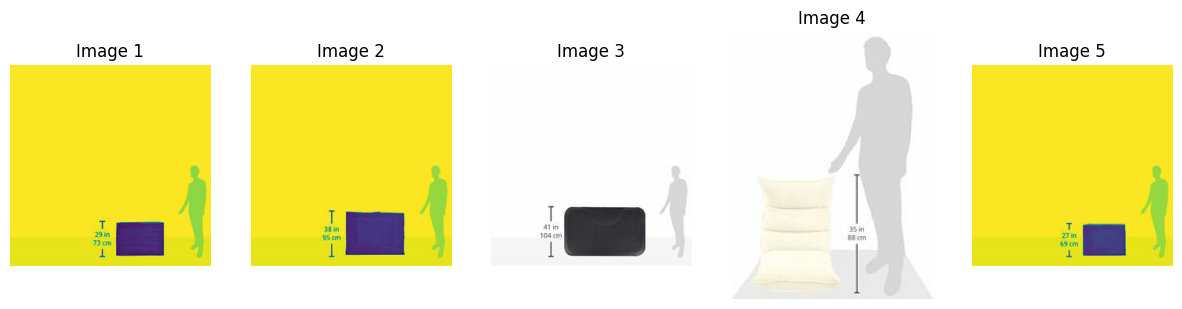

In [15]:
from src.db import engine
from src.search import ImageSearch
from sentence_transformers import SentenceTransformer
from src.utils import load_valid_image_paths
from src.vectorization import vectorize_images

model = SentenceTransformer("clip-ViT-B-32")

image_paths = load_valid_image_paths("../data/metadata/images.csv.gz", "data/images")


# Przekształć obrazy na embeddingi
vectorize_images(engine, model, image_paths)

search = ImageSearch(engine, model)
search("a modern red sofa", k=5)

In [ ]:
from sqlalchemy.orm import Session
from src.db import Img, engine

with Session(engine) as session:
    count = session.query(Img).count()
    print(f"Obrazów w bazie: {count}")

🧠 Obrazów w bazie: 500
